# Loading Libraries, Importing Datasets and Basic Analysis

In [291]:
## Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
## importing the dataset

df = pd.read_csv("DRUG BATCH SIDE EFFECTS DATASET 0.1.csv")

In [293]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [294]:
df.shape

(400000, 6)

##### Analyzing Null Values,Unique values and  Descriptive Statistics

In [295]:
#  descriptive statistics for Numerical column
df.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [296]:
#  descriptive statistics for categorical columns
df.describe(include = 'object')

,NAME,GENDER,DRUG NAME,RACE,SIDE EFFECTS
count,400000,400000,400000,400000,400000
unique,133911,2,502,9,5
top,William,F,paxil,White,Mild Side Effects
freq,42,237751,6269,314074,133236


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [298]:
df.duplicated().value_counts(normalize=True)*100

False    99.552
True      0.448
dtype: float64

Only 0.44% data is duplicate

In [299]:
# Use the drop_duplicates method to remove duplicate rows
df= df.drop_duplicates()

In [300]:
df.shape

(398208, 6)

In [301]:
# Number of unique value in each column
df.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 80
RACE                 9
SIDE EFFECTS         5
dtype: int64

In [302]:
df.columns

Index(['NAME', 'GENDER', 'DRUG NAME', 'AGE', 'RACE', 'SIDE EFFECTS'], dtype='object')

In [303]:
features = ['GENDER', 'RACE', 'SIDE EFFECTS']

[{col:(df[col].unique().tolist())} for col in features]






[{'GENDER': ['M', 'F']},
 {'RACE': ['White',
   'Hispanic, White',
   'Unknown',
   'Black',
   'Other',
   'Hispanic, Black',
   'Asian, Other',
   'Asian Indian',
   'Chinese']},
 {'SIDE EFFECTS': ['Mild Side Effects',
   'Extremely Severe Side Effects',
   'Severe Side Effects',
   'No Side Effects',
   'Moderate Side Effects']}]

In [304]:
df['DRUG NAME'].unique()

array(['topamax', 'zocor', 'tazorac', 'voltaren', 'tramadol', 'valtrex',
       'levoxyl', 'imitrex', 'seroquel', 'minocycline', 'proscar',
       'keflex', 'cataflam', 'zyrtec', 'lexapro', 'spironolactone',
       'claripel-cream', 'wellbutrin-sr', 'prozac', 'wellbutrin-xl',
       'citalopram', 'baclofen', 'concerta', 'singulair', 'angeliq',
       'yasmin', 'cialis', 'lunesta', 'cymbalta', 'methotrexate',
       'lamictal', 'evoclin', 'actonel', 'protonix', 'premarin',
       'provigil', 'protopic', 'prednisone', 'diazepam', 'ultram',
       'albuterol', 'zovirax', 'asacol', 'zegerid', 'halcion', 'differin',
       'nexium', 'phenergan', 'propecia', 'enalapril', 'chantix', 'avita',
       'synthroid', 'renova', 'buspar', 'retin-a-micro', 'climara',
       'estrace', 'klonopin', 'ambien', 'prevacid', 'lipitor',
       'wellbutrin', 'seasonique', 'paxil', 'nortriptyline', 'amoxil',
       'nitrofurantoin', 'tamiflu', 'noroxin', 'acyclovir', 'aromasin',
       'celebrex', 'claritin', '

In [305]:
df['AGE'].unique()

array([ 41.,  53.,  31.,  44.,  24.,  55.,  34.,  28.,  38.,  56.,  18.,
        35.,  50.,  52.,  62.,  42.,  23.,  40.,  22.,  32.,  39.,  51.,
        29.,  43.,  57.,  26.,  60.,  36.,  54.,  70.,  37.,  30.,  65.,
        47.,  33.,  58.,  25.,  49.,  46.,  48.,  59.,  71.,  63.,  45.,
        67.,  21.,  27.,  17.,  20.,  66.,  61.,  64.,  15.,  69.,  19.,
       300.,  73.,  68.,  72.,  74.,  75.,  14.,  nan, 302.,  87.,  90.,
        84.,  80., 500., 400., 203., 160., 191., 450., 390.,  77., 155.,
       600., 211., 401.,  89.])

In [306]:

miss_num = df.isna().sum()

miss_per = df.isna().mean()*100

print("Number of Missing Values:\n", miss_num, "\n\nPercentage of Missing Values:\n", miss_per)




Number of Missing Values:
 NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64 

Percentage of Missing Values:
 NAME            0.000000
GENDER          0.000000
DRUG NAME       0.000000
AGE             0.005023
RACE            0.000000
SIDE EFFECTS    0.000000
dtype: float64


Only 0.005% of data is missing in age column

# Exploratory Data Analysis

#### Univariate Analysing Gender, Race and Side Effect

In [307]:
features = ['GENDER', 'RACE', 'SIDE EFFECTS']

for feature in features:
   count = df[feature].value_counts()
   print('\n\nValue count for', feature, ":\n", count)



Value count for GENDER :
 F    236852
M    161356
Name: GENDER, dtype: int64


Value count for RACE :
 White              312673
Hispanic, White     43870
Black               35693
Unknown              3032
Hispanic, Black      1658
Other                1002
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64


Value count for SIDE EFFECTS :
 Mild Side Effects                132667
No Side Effects                  115247
Moderate Side Effects             74166
Severe Side Effects               53194
Extremely Severe Side Effects     22934
Name: SIDE EFFECTS, dtype: int64


In [308]:
for feature in features:
   count = df[feature].value_counts(normalize=True)*100
   print('\n\nValue count for', feature, ":\n", count)



Value count for GENDER :
 F    59.479468
M    40.520532
Name: GENDER, dtype: float64


Value count for RACE :
 White              78.520020
Hispanic, White    11.016856
Black               8.963406
Unknown             0.761411
Hispanic, Black     0.416365
Other               0.251627
Asian, Other        0.042189
Asian Indian        0.026117
Chinese             0.002009
Name: RACE, dtype: float64


Value count for SIDE EFFECTS :
 Mild Side Effects                33.316006
No Side Effects                  28.941408
Moderate Side Effects            18.624940
Severe Side Effects              13.358345
Extremely Severe Side Effects     5.759302
Name: SIDE EFFECTS, dtype: float64


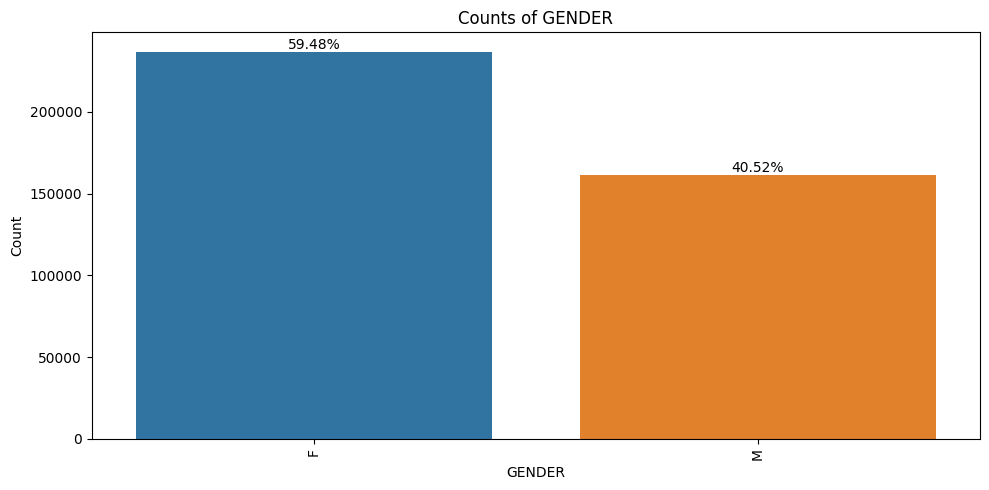

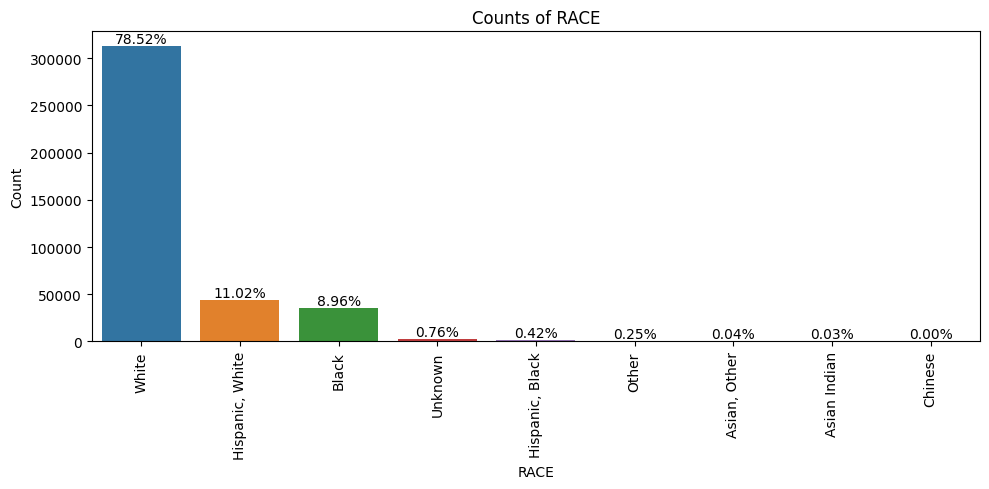

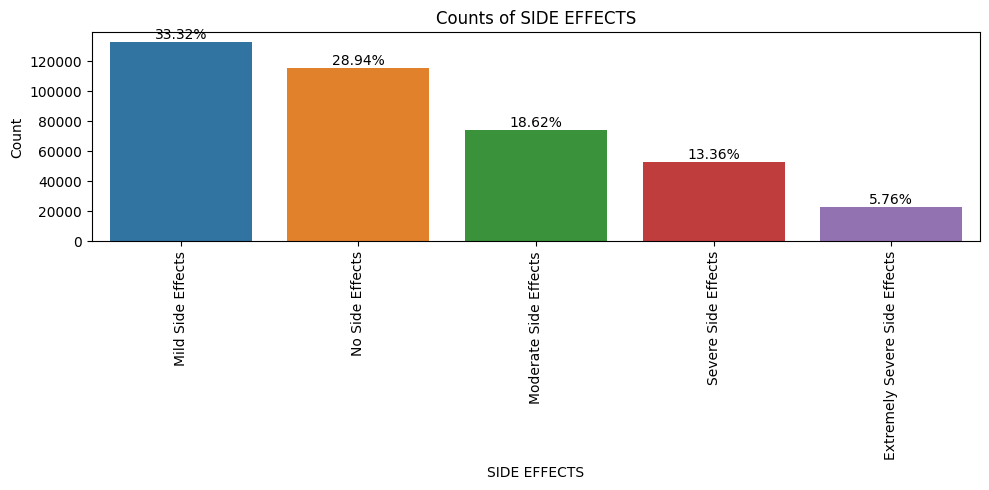

In [309]:


# Iterate over features and create bar plots
for feature in features:
    total_count = len(df[feature])
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Counts of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tick_params(axis='x', rotation=90)

    # Calculate and display percentages
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.1,
                       f'{(height / total_count) * 100:.2f}%',
                       ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

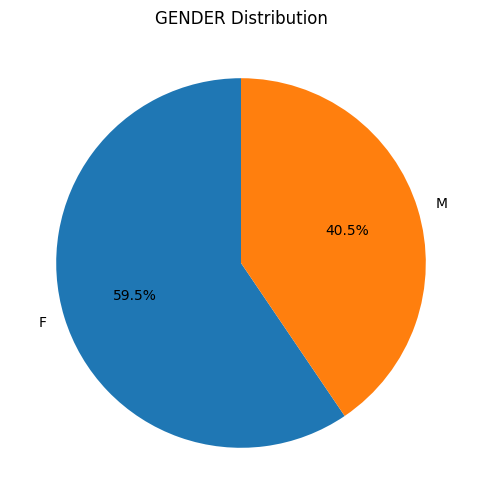

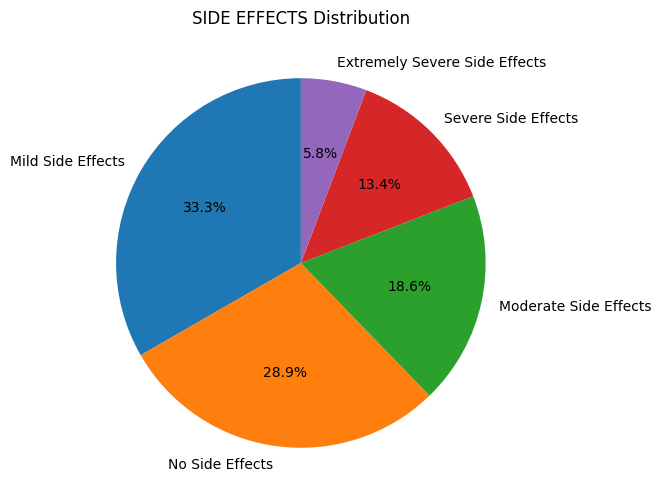

In [310]:
features = ['GENDER', 'SIDE EFFECTS']

# Iterate over features and create pie charts
for feature in features:
    counts = df[feature].value_counts()
    labels = counts.index
    sizes = counts.values
      # Explode the first slice for better visibility

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{feature} Distribution')

    plt.show()

#### Univariate Analysis of AGE

In [311]:
df['AGE'].min(),df['AGE'].max()

(14.0, 600.0)

minimum age is 14 years and maximum age is 600 years

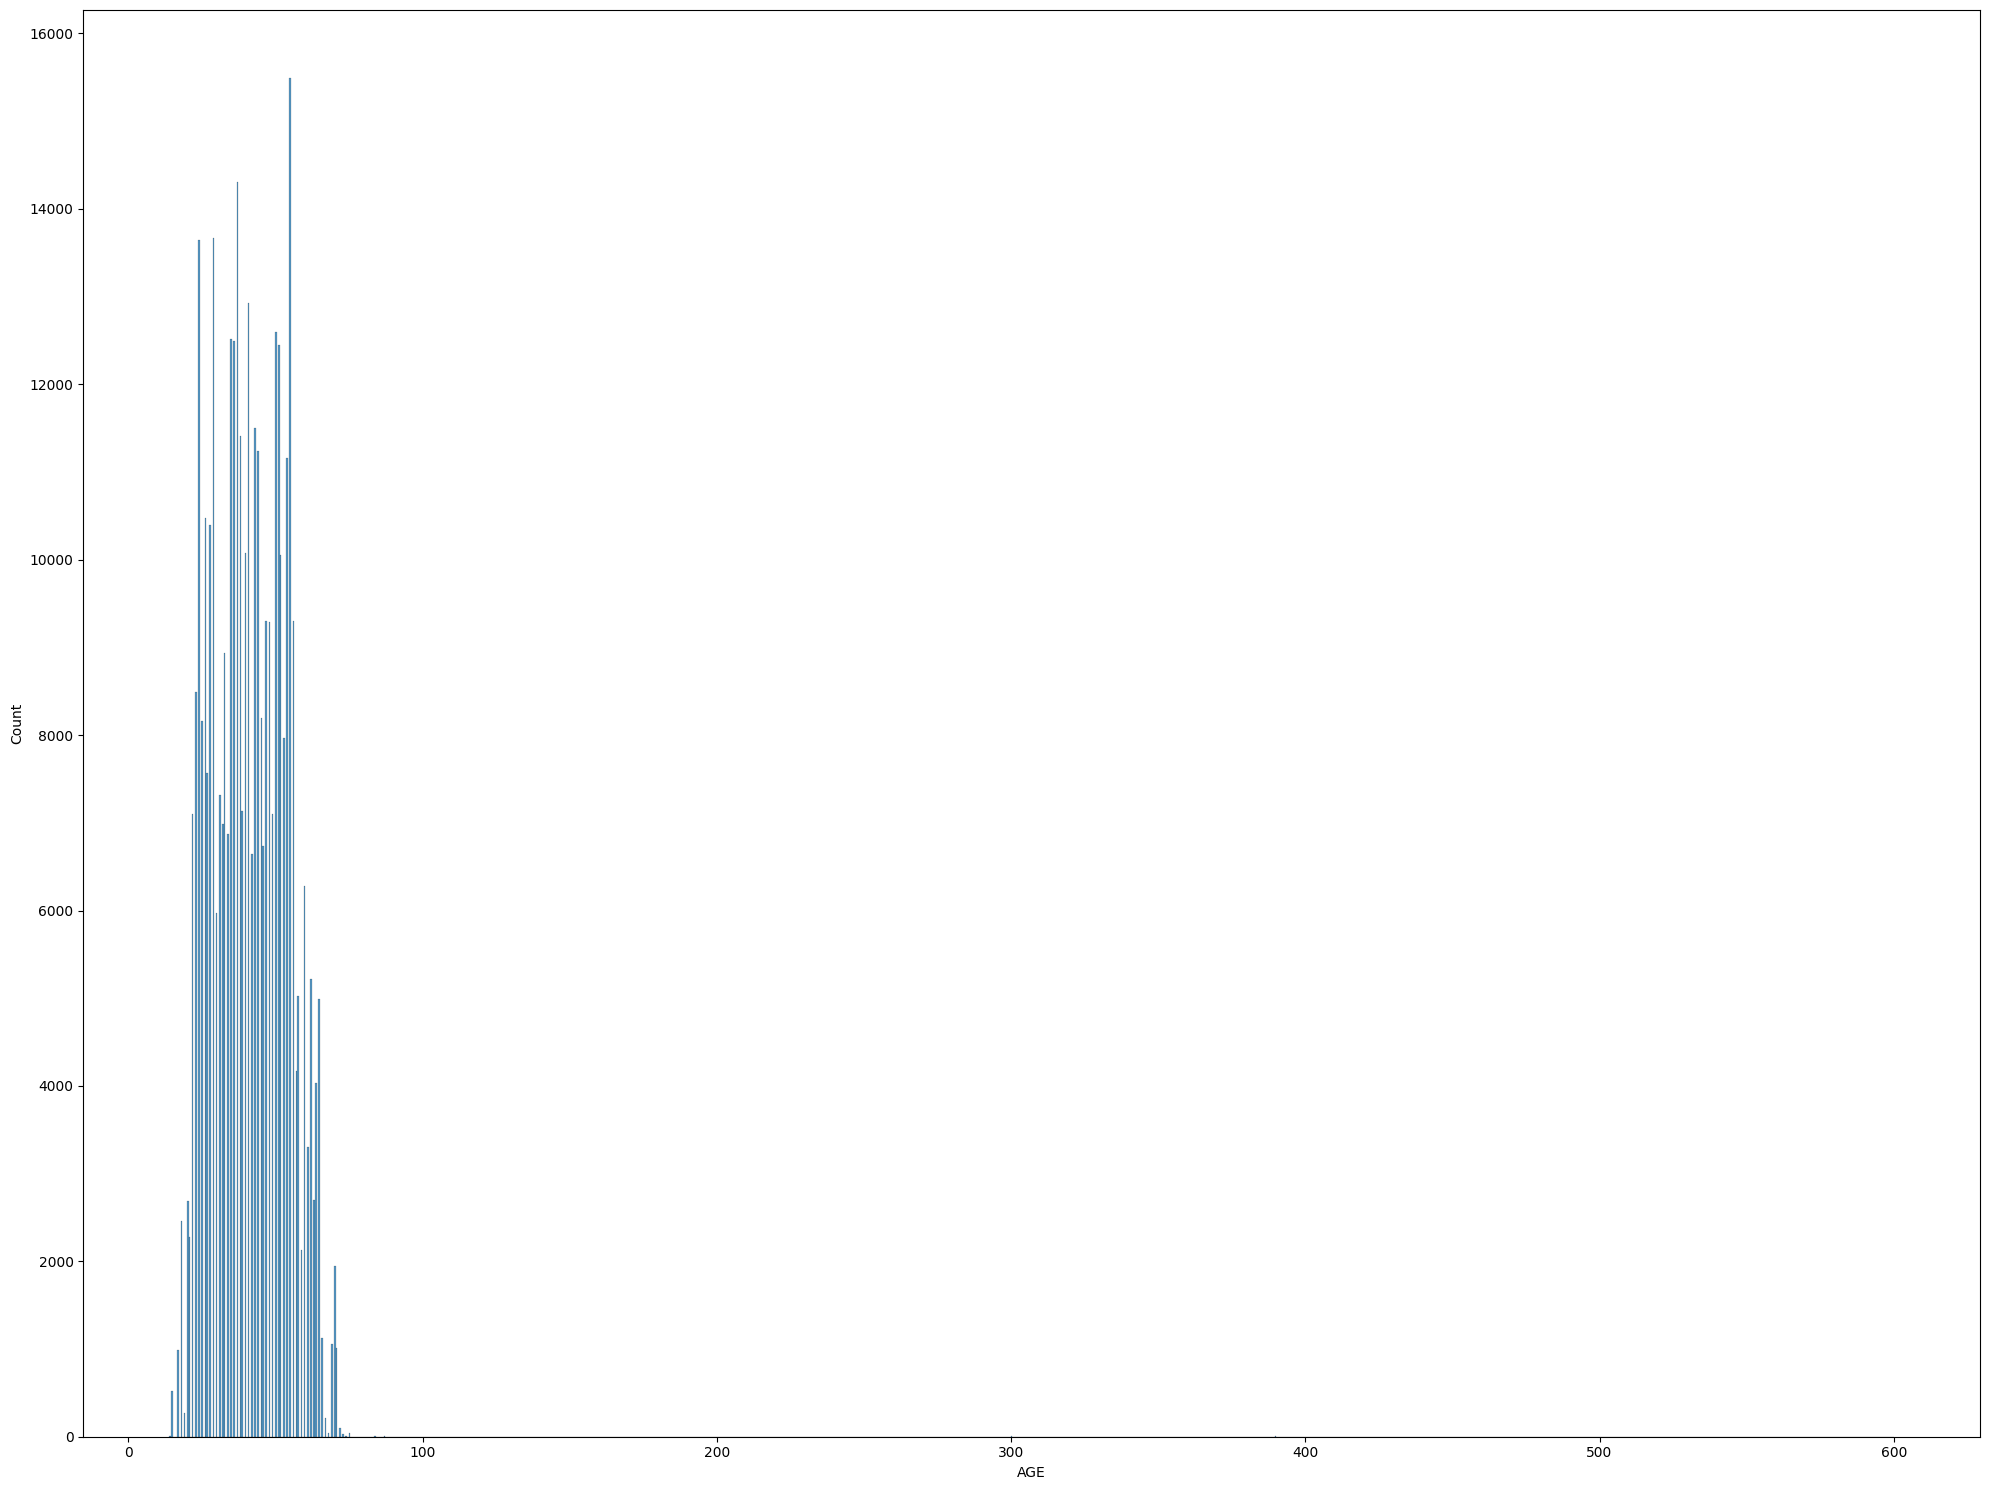

In [312]:


plt.figure(figsize=(20, 15))
sns.histplot(x = df['AGE'],data=df,)
plt.tight_layout()
plt.show()


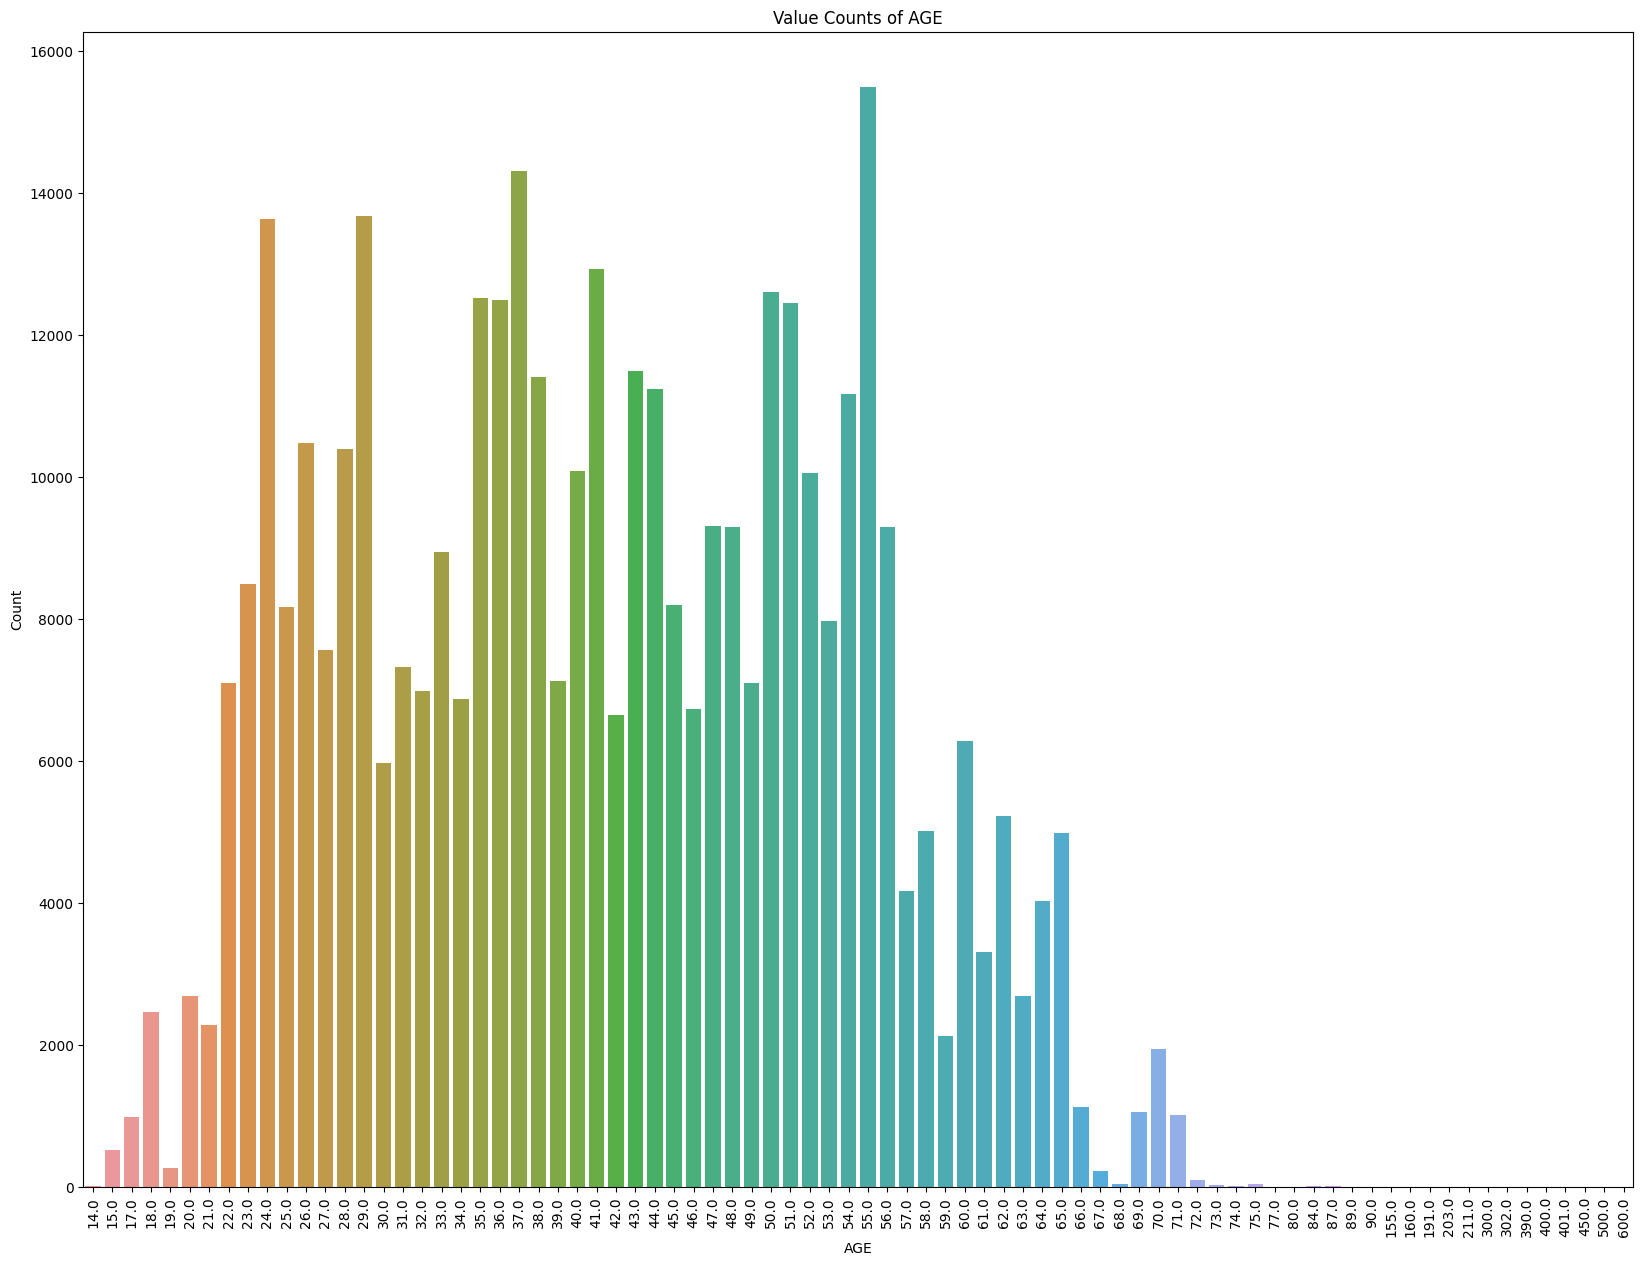

In [313]:
## ase data is not properli visisble in hisplot

# Calculate value counts for 'AGE'
age_counts = df['AGE'].value_counts().sort_index()

# Create a bar plot for the value counts of 'AGE'
plt.figure(figsize=(20, 15))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Value Counts of AGE')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='AGE', ylabel='Density'>

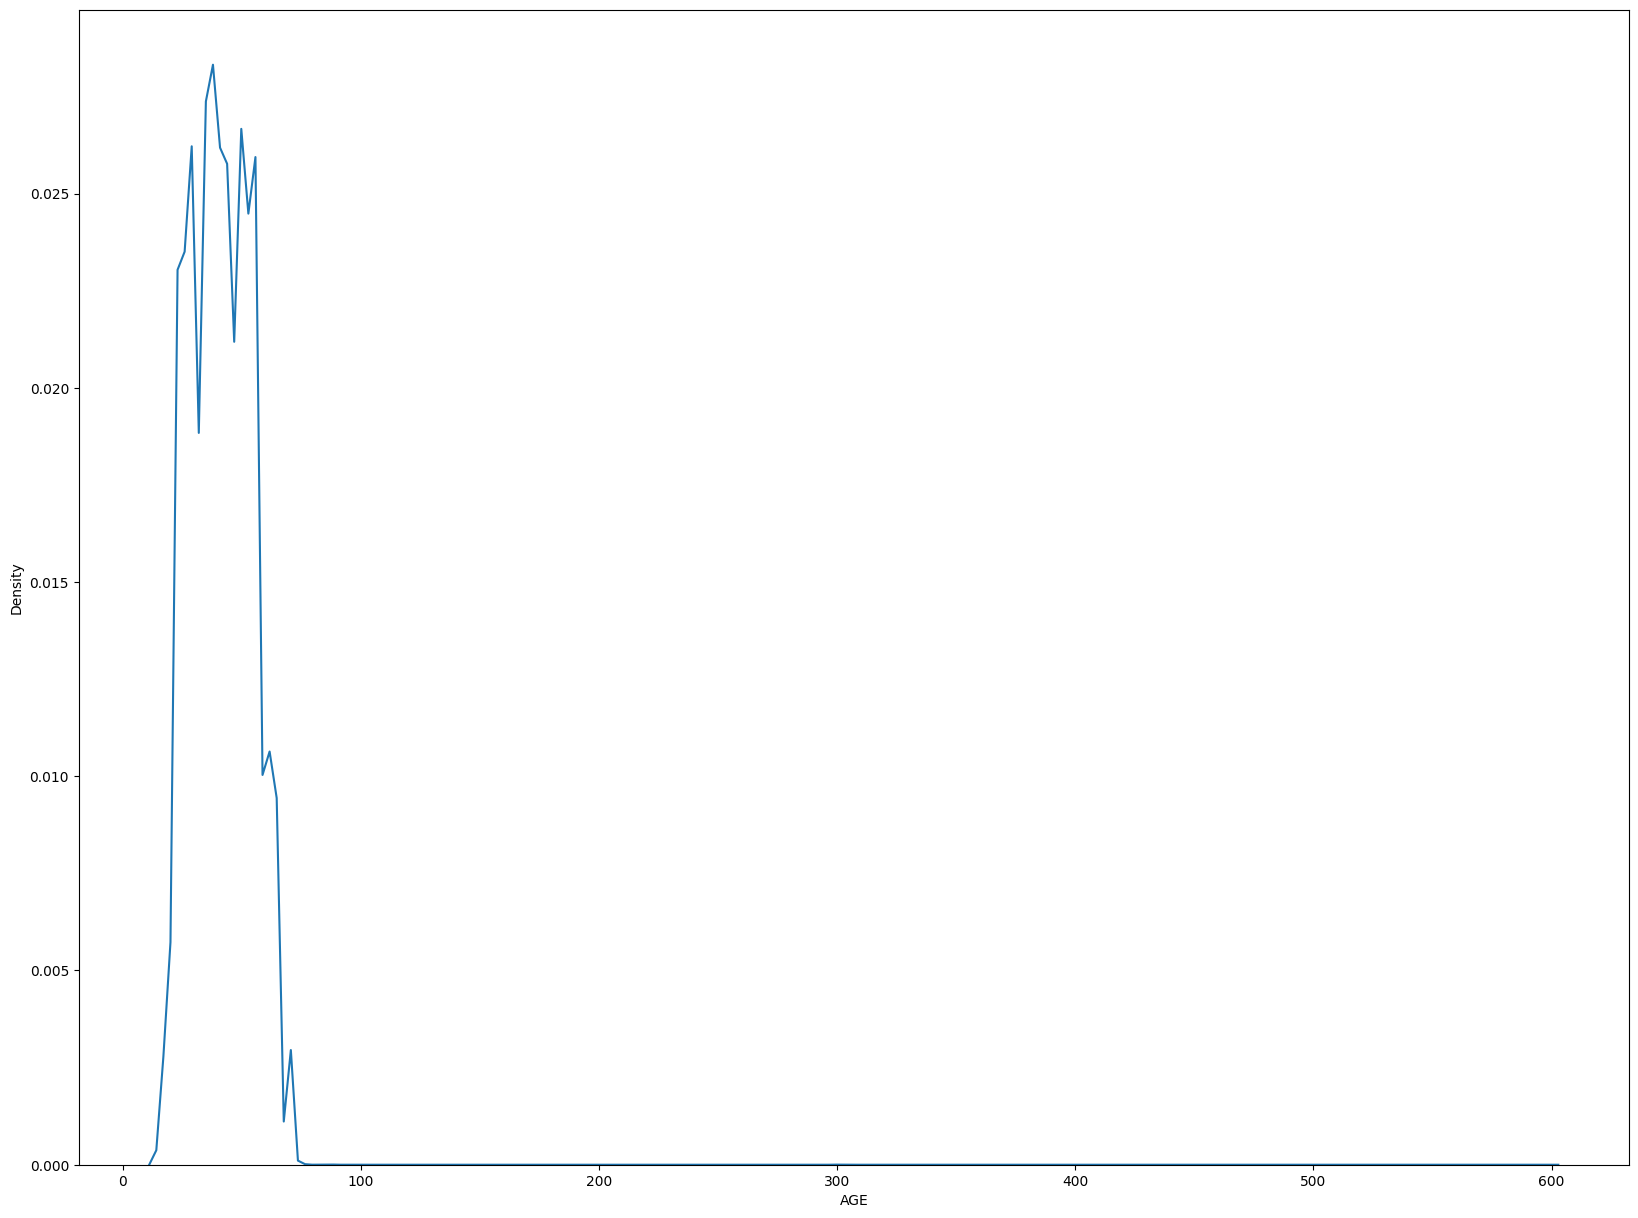

In [314]:
plt.figure(figsize=(20, 15))
sns.kdeplot(x = df['AGE'],data=df,)

In [315]:
pd.set_option('display.max_rows', None)
df['AGE'].value_counts().sort_index()

14.0         8
15.0       516
17.0       986
18.0      2459
19.0       272
20.0      2683
21.0      2282
22.0      7101
23.0      8486
24.0     13640
25.0      8165
26.0     10481
27.0      7567
28.0     10399
29.0     13671
30.0      5977
31.0      7322
32.0      6985
33.0      8939
34.0      6872
35.0     12514
36.0     12488
37.0     14307
38.0     11408
39.0      7130
40.0     10079
41.0     12925
42.0      6648
43.0     11496
44.0     11237
45.0      8192
46.0      6736
47.0      9304
48.0      9289
49.0      7100
50.0     12599
51.0     12453
52.0     10058
53.0      7972
54.0     11165
55.0     15493
56.0      9300
57.0      4175
58.0      5020
59.0      2128
60.0      6276
61.0      3308
62.0      5224
63.0      2696
64.0      4032
65.0      4989
66.0      1128
67.0       218
68.0        48
69.0      1056
70.0      1945
71.0      1017
72.0        96
73.0        32
74.0         8
75.0        48
77.0         1
80.0         1
84.0         8
87.0         9
89.0         1
90.0      


The distribution of age is left-skewed, with the majority of patients falling within the age range of 22-56.

#### Univariate Analysis of DRUG NAME

In [316]:
#Value count  of each drug
df['DRUG NAME'].value_counts().sort_values(ascending=False)


paxil                            6243
lamictal                         6015
nexium                           6001
levoxyl                          5927
lexapro                          5667
ambien                           5662
citalopram                       5536
prozac                           5514
retin-a                          5311
effexor                          5258
chantix                          5163
differin                         5128
provigil                         5032
topamax                          4602
augmentin                        4511
neurontin                        4210
ultram                           4021
amoxil                           3970
propecia                         3958
synthroid                        3831
retin-a-micro                    3696
doxycycline                      3680
elavil                           3576
metrogel                         3493
seroquel                         3289
wellbutrin                       3283
wellbutrin-x

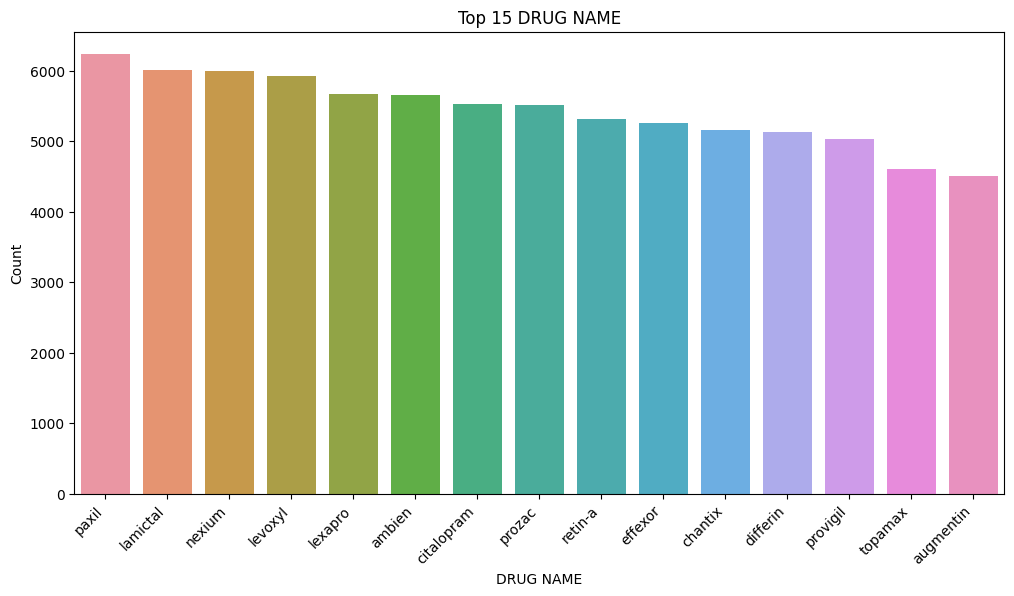

In [317]:
## Bar Plot for top 15 Drugs
df['DRUG NAME'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=df['DRUG NAME'].value_counts().head(15).index, y=df['DRUG NAME'].value_counts().head(15).values)
plt.title(f'Top 15 DRUG NAME')
plt.xlabel('DRUG NAME')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [318]:
least_pref_drug = df[df['DRUG NAME'].map(df['DRUG NAME'].value_counts()) == 8]
least_pref_drug['DRUG NAME'].value_counts()


trilipix                         8
inspra                           8
asmanex                          8
accolate                         8
vicoprofen                       8
sanctura-xr                      8
nardil                           8
pepcid                           8
nasacort-aq                      8
bystolic                         8
zyvox                            8
vesicare                         8
metformin-extended-release       8
mercaptopurine                   8
vigamox                          8
progesterone                     8
proloprim                        8
adcirca                          8
exelon                           8
lasix                            8
elmiron                          8
trental                          8
trileptal                        8
gonal-f-rff                      8
baciim                           8
cardura                          8
arthrotec                        8
tapazole                         8
vistaril            

In [319]:
least_pref_drug['DRUG NAME'].nunique()

101

A total of 101 drugs are considered least preferred.

#### Bivariate Analysis

##### Bivariate Analysis age and gender

In [320]:


# Define age groups
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Creating  contingency table with age groups and gender
df['Age_Group'] = pd.cut(df['AGE'], bins=range(0, 81, 5), labels=age_groups)
contingency_table = pd.crosstab(df['Age_Group'], df['GENDER'])

# Displaying the contingency table
print(contingency_table)




GENDER         F      M
Age_Group              
10-14        304    220
15-19       3793   2607
20-24      23612  16062
25-29      28693  19402
30-34      25452  17180
35-39      32937  22475
40-44      30051  20447
45-49      26713  18315
50-54      34014  23127
55-59      15905  10994
60-64      12033   8216
65-69       2608   1787
70-74        705    496
75+            1      1


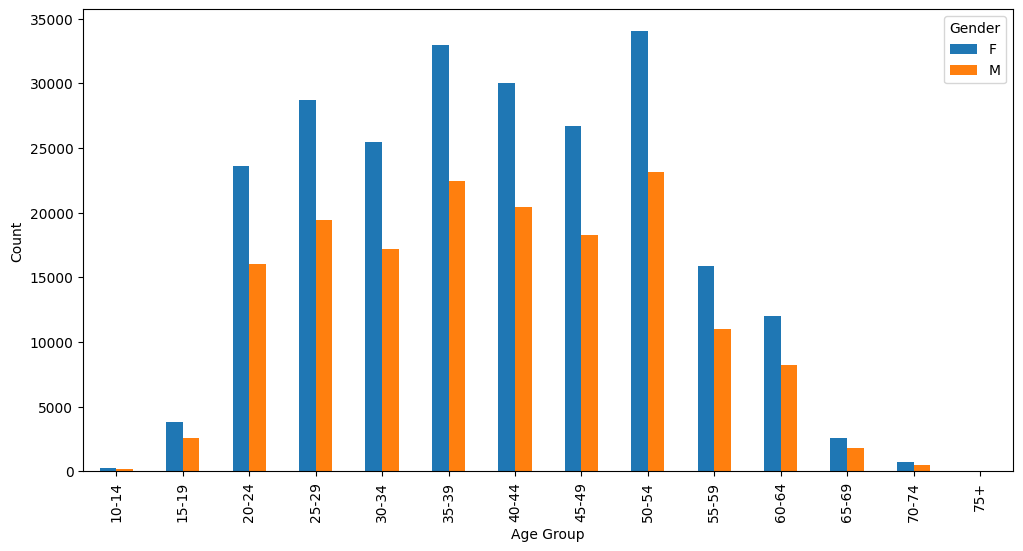

In [321]:
# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')



plt.show()


MAJORITY PATIENTS ARE IN THE AGE GROUP OF 20-59, AND OUT OF THAT TOO FEMALES ARE HIGHER THAN MALES IN ALL GROUPS

In case of percentage wise also  TOO FEMALES ARE HIGHER THAN MALES IN ALL GROUPS

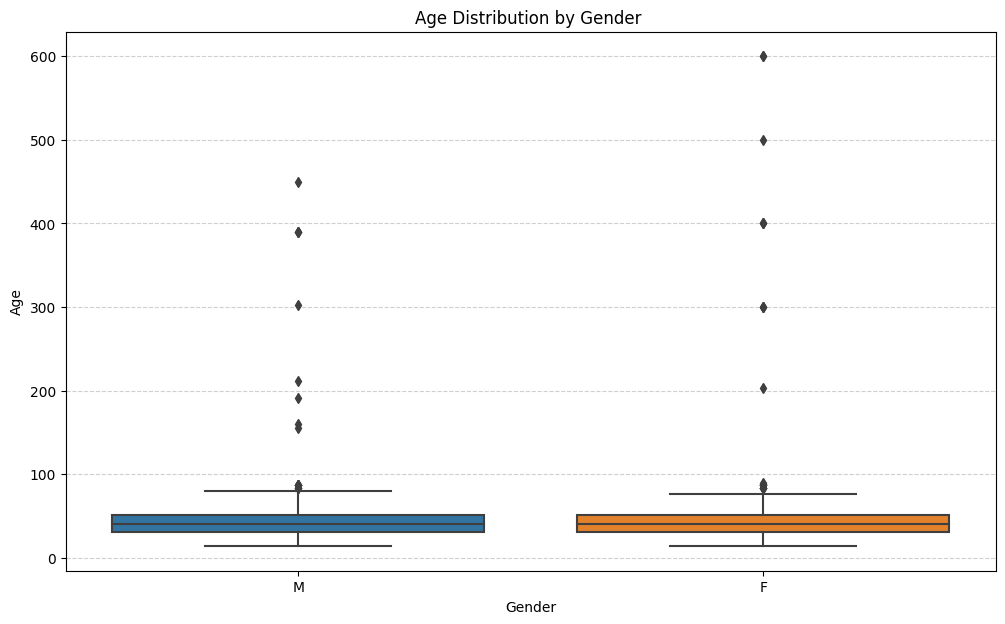

In [322]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='GENDER', y='AGE', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender ')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Regardless of gender, individuals of the same age are experiencing the illness.

##### Bivariate Analysis GENDER VS SIDE EFFECTS

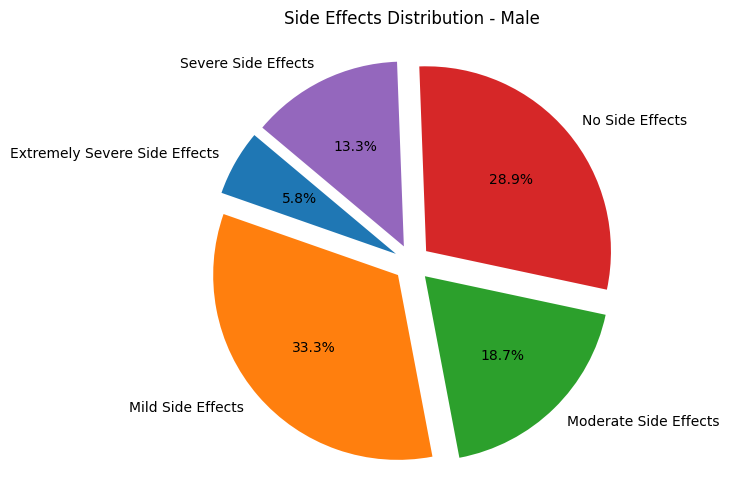

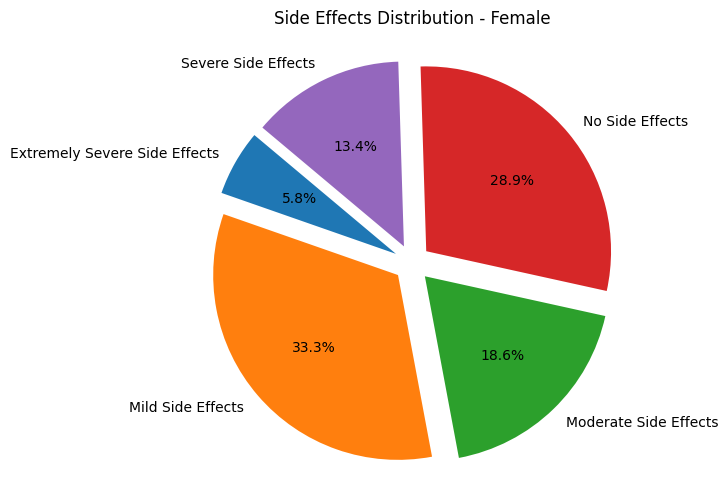

In [323]:
contingency_table = pd.crosstab(df['GENDER'], df['SIDE EFFECTS'], margins=True, margins_name='Total')

# Calculate percentages for Male and Female
percentages = contingency_table.div(contingency_table['Total'], axis=0) * 100

# Plot pie chart for Male
plt.figure(figsize=(6, 6))
plt.pie(percentages.loc['M'][:-1], labels=percentages.columns[:-1], autopct='%1.1f%%', startangle=140, explode=[0.1]*len(percentages.columns[:-1]))
plt.title("Side Effects Distribution - Male")
plt.show()

# Plot pie chart for Female
plt.figure(figsize=(6, 6))
plt.pie(percentages.loc['F'][:-1], labels=percentages.columns[:-1], autopct='%1.1f%%', startangle=140, explode=[0.1]*len(percentages.columns[:-1]))
plt.title("Side Effects Distribution - Female")
plt.show()

In [324]:
contingency_table = pd.crosstab(df['GENDER'], df['SIDE EFFECTS'], margins=True, margins_name='Total')
contingency_table

SIDE EFFECTS,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,Total
GENDER,,,,,,
F,13647,78867,44048,68554,31736,236852
M,9287,53800,30118,46693,21458,161356
Total,22934,132667,74166,115247,53194,398208


<Figure size 1200x1200 with 0 Axes>

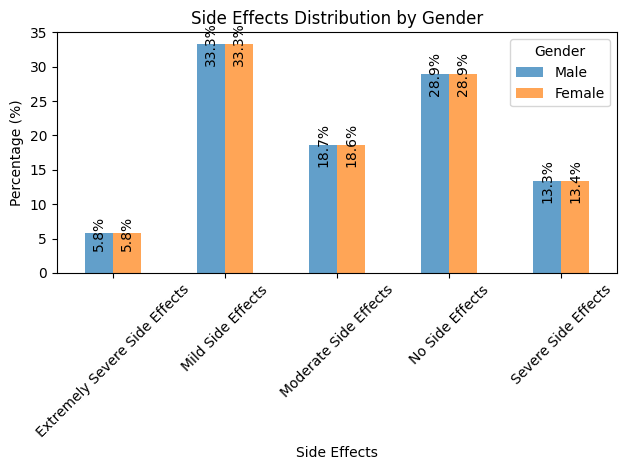

In [325]:


# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Calculate percentages for Male and Female
male_percentages = (male_table / male_table['Total'])[:-1] * 100
female_percentages = (female_table / female_table['Total'])[:-1] * 100

# Combine Male and Female percentages into a single DataFrame
combined_percentages = pd.concat([male_percentages, female_percentages], axis=1, keys=['Male', 'Female'])

# Plot grouped bar chart
plt.figure(figsize=(12, 12))
combined_percentages.plot(kind='bar', alpha=0.7)

plt.title("Side Effects Distribution by Gender")
plt.xlabel("Side Effects")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Add percentages above the bars
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',rotation =90)

plt.show()

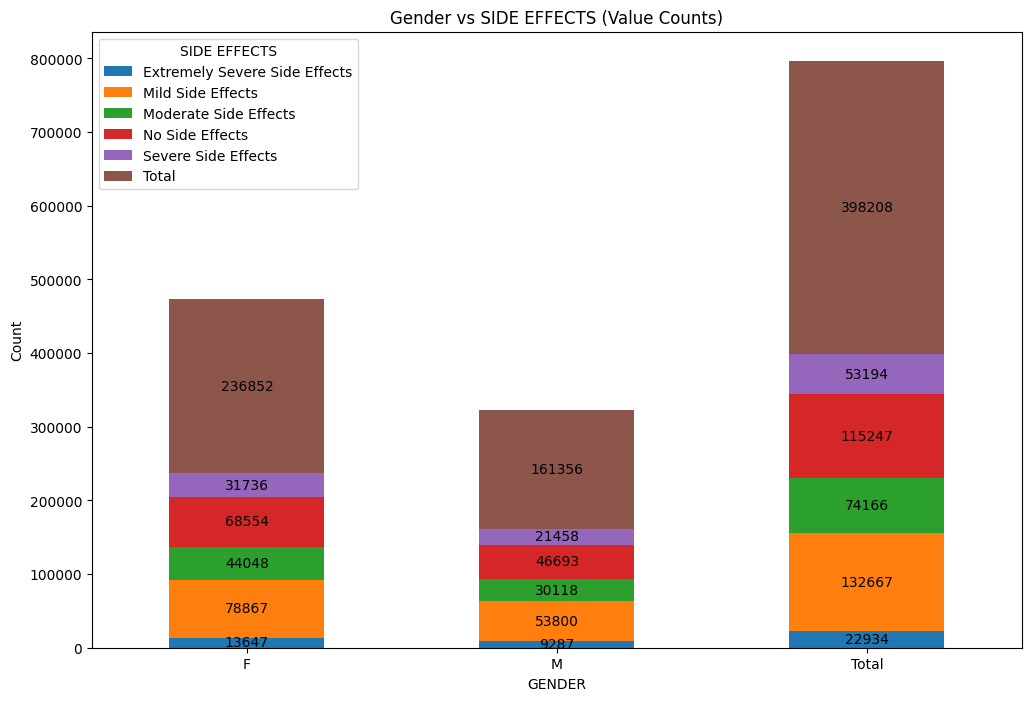

In [326]:
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add value counts annotations to each segment
for container in ax.containers:
    for p in container.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x(), p.get_y()
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

# Customize plot labels and title
ax.set_xlabel('GENDER')
ax.set_ylabel('Count')
ax.set_title('Gender vs SIDE EFFECTS (Value Counts)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='SIDE EFFECTS')

IRRESPECTIVE OF THE GENDER ,PATIENTS WITH MILD SIDE EFFECTS ARE MAX, AND THOSE WITH EXTREME SEVERE SIDE EFFECTS ARE MIN.

##### Bivariate Analysis GENDER VS RACE

In [327]:
contingency_table = pd.crosstab(df['GENDER'], df['RACE'], margins=True, margins_name='Total')
contingency_table

RACE,Asian Indian,"Asian, Other",Black,Chinese,"Hispanic, Black","Hispanic, White",Other,Unknown,White,Total
GENDER,,,,,,,,,,
F,60,99,21217,5,976,26239,589,1814,185853,236852
M,44,69,14476,3,682,17631,413,1218,126820,161356
Total,104,168,35693,8,1658,43870,1002,3032,312673,398208


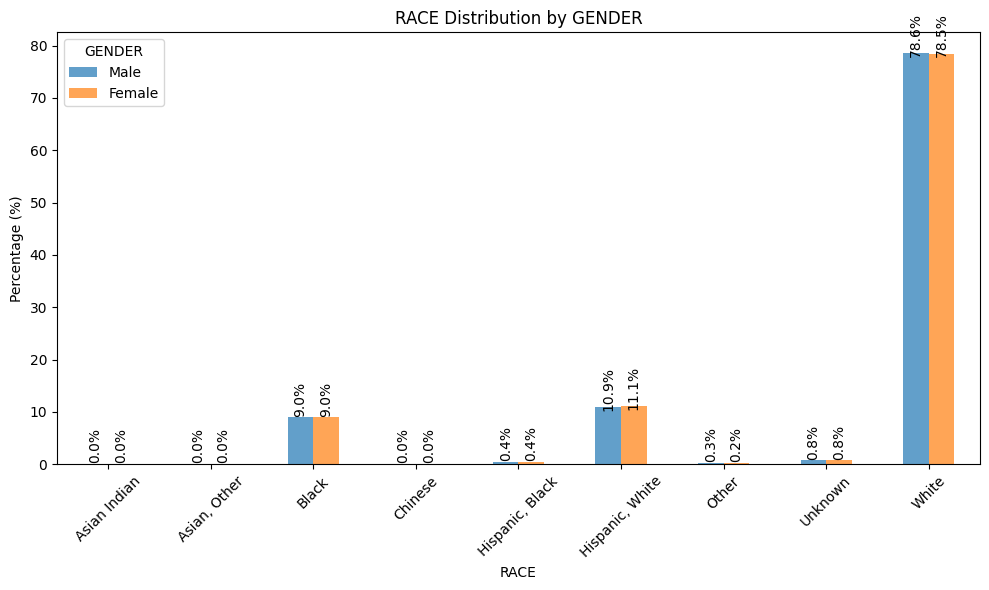

In [328]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a contingency_table defined

# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Calculate percentages for Male and Female
male_percentages = (male_table / male_table['Total'])[:-1] * 100
female_percentages = (female_table / female_table['Total'])[:-1] * 100

# Combine the percentages into a single DataFrame
combined_percentages = pd.concat([male_percentages, female_percentages], axis=1, keys=['Male', 'Female'])

# Plot the combined bar chart
ax = combined_percentages.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Add percentages above the bars with increased distance
for container in ax.containers:
    for p in container.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width / 2, p.get_y() + height + 3.5 # Increased distance by changing the 'y' coordinate
        ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black', rotation=90)

plt.title("RACE Distribution by GENDER")
plt.xlabel("RACE")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title='GENDER')

plt.tight_layout()
plt.show()

plt.show()


MAJORITY PATIENTS ARE WHITES ,CHINESE ARE MINORITY

##### Bivariate Analysis GENDER VS DRUG NAME

In [329]:
contingency_table = pd.crosstab(df['GENDER'], df['DRUG NAME'])
contingency_table

DRUG NAME,abilify,accolate,accupril,accutane,aciphex,actiq,actonel,actos,acyclovir,aczone,...,zofran,zoloft,zomig,zovirax,zovirax-topical,zyban,zyprexa,zyrtec,zyrtec-d,zyvox
GENDER,,,,,,,,,,,,,,,,,,,,,
F,594,4,24,1396,13,10,349,575,1447,25,...,53,1532,648,1763,5,361,602,1836,872,4
M,411,4,16,941,11,6,248,382,998,15,...,43,998,460,1165,3,265,436,1251,610,4


In [330]:
sorted_drugs = contingency_table.sum().sort_values(ascending=False)
sorted_drugs

DRUG NAME
paxil                            6243
lamictal                         6015
nexium                           6001
levoxyl                          5927
lexapro                          5667
ambien                           5662
citalopram                       5536
prozac                           5514
retin-a                          5311
effexor                          5258
chantix                          5163
differin                         5128
provigil                         5032
topamax                          4602
augmentin                        4511
neurontin                        4210
ultram                           4021
amoxil                           3970
propecia                         3958
synthroid                        3831
retin-a-micro                    3696
doxycycline                      3680
elavil                           3576
metrogel                         3493
seroquel                         3289
wellbutrin                       3283
we

<Figure size 2500x2000 with 0 Axes>

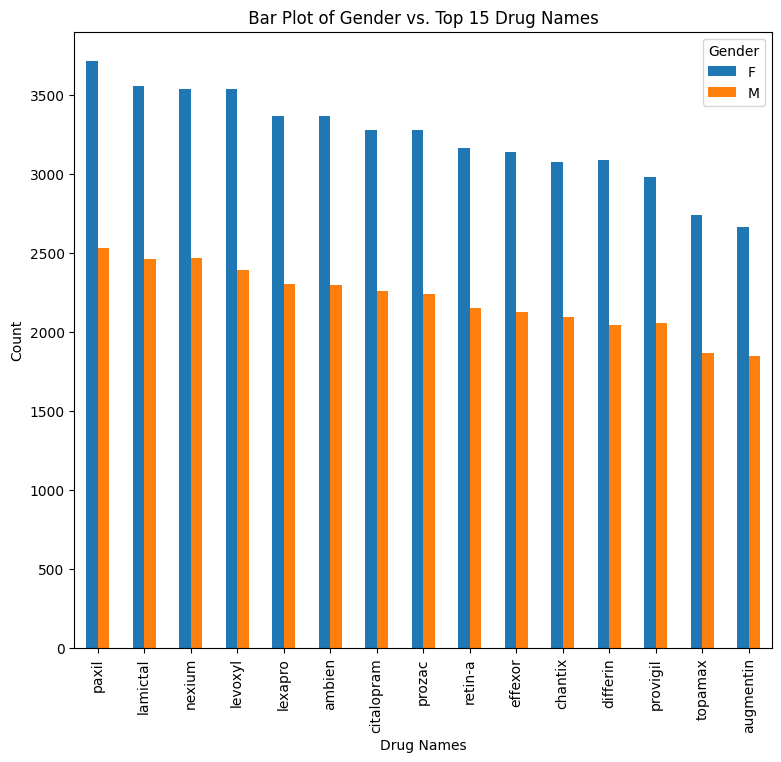

In [331]:
# Select the top 15 drug names
top_15_drugs = sorted_drugs.head(15)

# Create a DataFrame with the selected drug names
selected_contingency = contingency_table[top_15_drugs.index]
# Create a bar plot
plt.figure(figsize=(25, 20))
selected_contingency.T.plot(kind='bar',figsize=(9,8))

plt.xlabel('Drug Names')
plt.ylabel('Count')
plt.title(' Bar Plot of Gender vs. Top 15 Drug Names ')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=90)

plt.show()

Paxil : Used for depression, obsessive-compulsive disorder (OCD), panic disorder, social anxiety disorder, generalized anxiety disorder (GAD), and post-traumatic stress disorder (PTSD).

Lamictal : Used for bipolar disorder and depression.

Levoxyl: Used for low thyroid production.

Nexium: Used for gastroesophageal reflux disease (GERD), Barrett's esophagus, and acid reflux.

Ambien : Used for insomnia.

Lexapro : Used for depression.

Citalopram: Used for depression.

Prozac : Used for depression.

Retin-A : Used for clearing the skin.

Effexor : Used for depression.

Chantix : Used to help people quit smoking.

Differin : Used for acne.

Provigil : Used for narcolepsy, sleep apnea, and shift work sleep disorder.

Topamax : Used for epilepsy and migraine headaches.

Augmentin : Used for bacterial infections.

TOP 15 DRUGS USED BY MALES AND FEMALES ARE SAME , THIS INDICATES BOTH HAVE SIMILAR HEALTH ISSUES ,mostly they are affected by depression or mental health issues

##### Bivariate Analysis DRUG NAME VS AGE

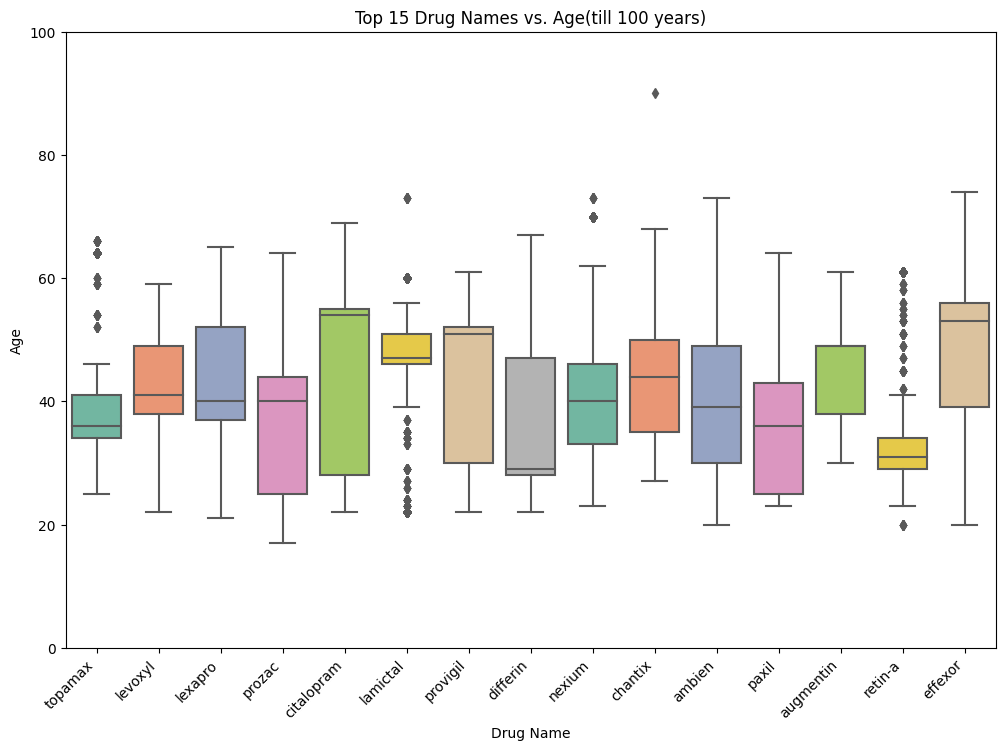

In [332]:
# Get the top 15 drug names
top_n = 15
top_drugs = df['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = df[df['DRUG NAME'].isin(top_drugs)]

# Create a box plot for the top 10 drug names vs. age
plt.figure(figsize=(12, 8))
sns.boxplot(x='DRUG NAME', y='AGE', data=filtered_data, palette='Set2')
plt.xlabel('Drug Name')
plt.ylabel('Age')
plt.title(f'Top {top_n} Drug Names vs. Age(till 100 years)')
plt.xticks(rotation=45, ha='right')

# Set the y-axis limits to show ages only up to 100
plt.ylim(0, 100)

plt.show()

##### Bivariate Analysis DRUG NAME VS RACE

In [333]:

# Get the top 15 drug names
top_n = 15
top_drugs = df['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = df[df['DRUG NAME'].isin(top_drugs)]

# Create a crosstab between the filtered 'DRUG NAME' and 'RACE'
cross_tab = pd.crosstab(filtered_data['DRUG NAME'], filtered_data['RACE'])

# Display the crosstab
cross_tab

RACE,Asian Indian,"Asian, Other",Black,"Hispanic, Black","Hispanic, White",Other,Unknown,White
DRUG NAME,,,,,,,,
ambien,0,0,1959,0,0,954,0,2749
augmentin,0,0,967,0,993,0,0,2551
chantix,0,8,32,8,1480,0,0,3635
citalopram,0,0,56,0,8,0,956,4516
differin,0,0,1015,0,96,0,0,4017
effexor,0,0,1067,0,581,0,0,3610
lamictal,0,0,971,0,1948,0,0,3096
levoxyl,0,0,0,0,88,0,0,5839
lexapro,16,0,0,0,168,0,0,5483


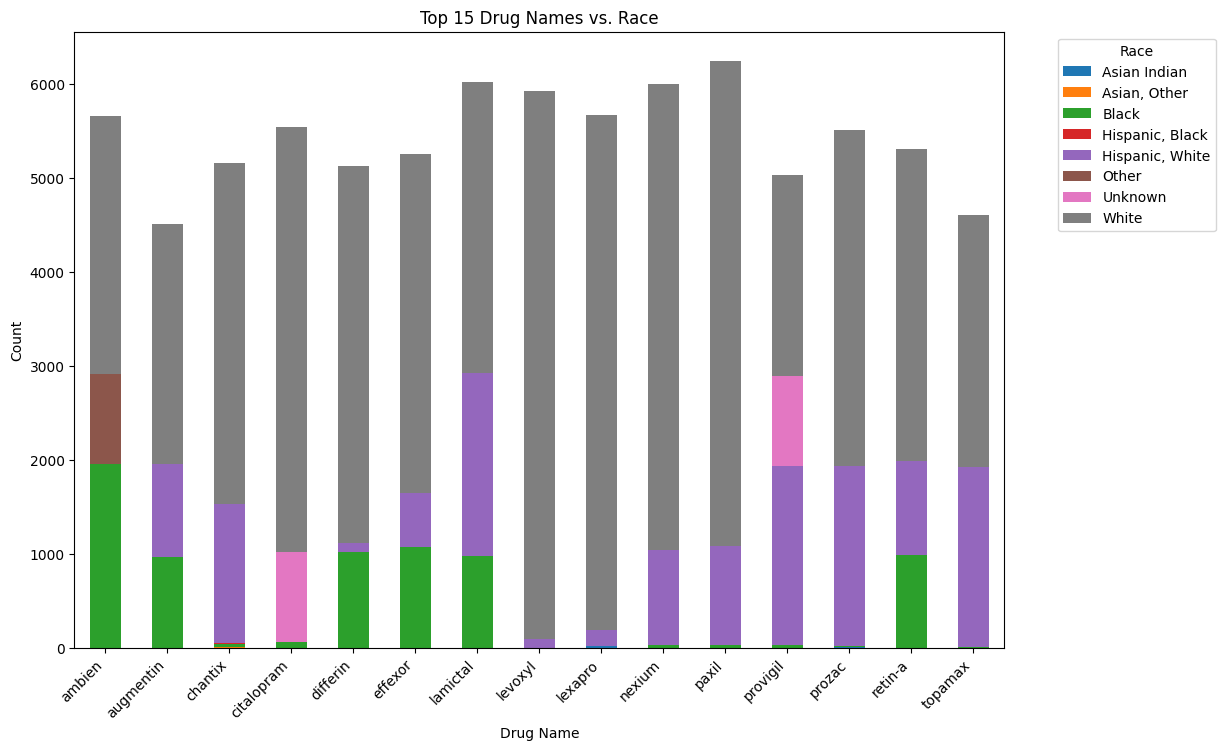

In [334]:
# Get the top 15 drug names
top_n = 15
top_drugs = df['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 15 drug names
filtered_data = df[df['DRUG NAME'].isin(top_drugs)]

# Create a DataFrame with counts of drug usage by race
drug_race_counts = filtered_data.groupby(['DRUG NAME', 'RACE']).size().unstack(fill_value=0)

# Plot a grouped bar plot
ax = drug_race_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Top 15 Drug Names vs. Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()



The top 15 drugs are commonly favored by individuals from White, Hispanic White, and Black ethnic backgrounds. These racial groups often contend with a shared health concern, which is depression.

##### Bivariate Analysis DRUG NAME VS SIDE EFFECTS

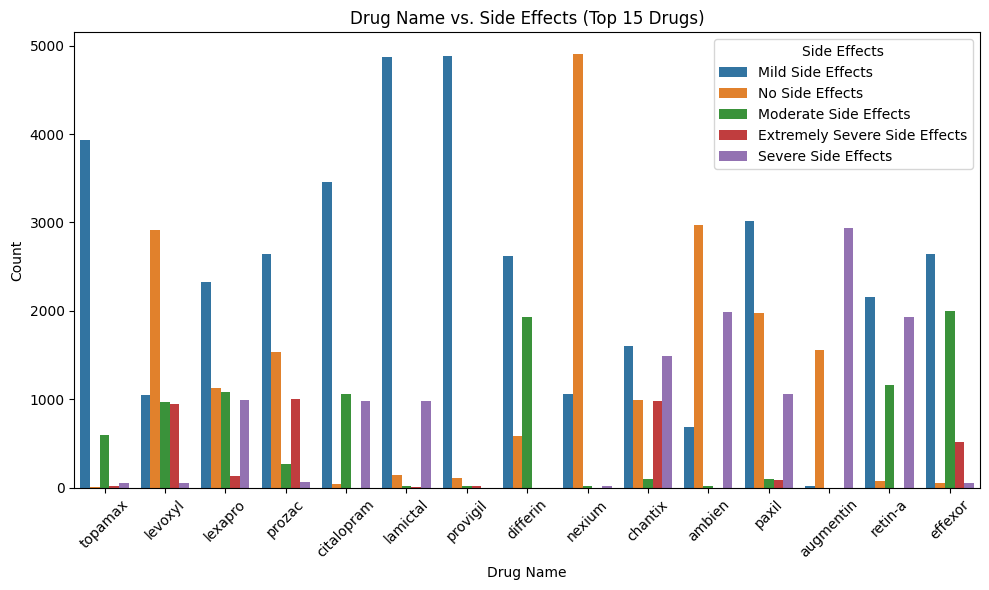

In [335]:
drug_counts = df['DRUG NAME'].value_counts()
top_15 = drug_counts.head(15).index.tolist()
filtered_df = df[df['DRUG NAME'].isin(top_15)]

# Create a countplot for Drug Name vs. Side Effects
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x='DRUG NAME', hue='SIDE EFFECTS', data=filtered_df)

# Set the title and labels for the plot
plt.title('Drug Name vs. Side Effects (Top 15 Drugs)')
plt.xlabel('Drug Name')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Side Effects', loc='upper right')  # Add legend
plt.tight_layout()
plt.show()

In [336]:
# Get the top 15 drug names
top_15_drugs = df['DRUG NAME'].value_counts().nlargest(15).index.tolist()

# Filter the DataFrame to include only the top 15 drugs
data_filtered = df[df['DRUG NAME'].isin(top_15_drugs)]

# Create the contingency table for top 10 drugs vs. side effects
contingency_table = pd.crosstab(data_filtered['DRUG NAME'], data_filtered['SIDE EFFECTS'])

print("Contingency Table for Top 15 Drug Names vs. Side Effects:")
contingency_table

Contingency Table for Top 15 Drug Names vs. Side Effects:


SIDE EFFECTS,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
DRUG NAME,,,,,
ambien,0,688,16,2973,1985
augmentin,0,24,0,1552,2935
chantix,985,1598,96,996,1488
citalopram,0,3460,1061,40,975
differin,0,2615,1933,580,0
effexor,517,2644,1993,56,48
lamictal,8,4872,16,144,975
levoxyl,947,1048,972,2912,48
lexapro,136,2329,1077,1128,997


AMBIEN ,CITALOPRAM ,NEXIUM , RETIN-A ARE THE ONES HAVING NO CASE OF EXTREME SIDE EFFECTS,but all have severe side effects only nexium out of this is having least patients with severe side effects too.

Nexium ,paxil and lamictal are the drugs which are either having very mild side efefcts or no side effects at all .

##### Bivariate Analysis AGE VS RACE

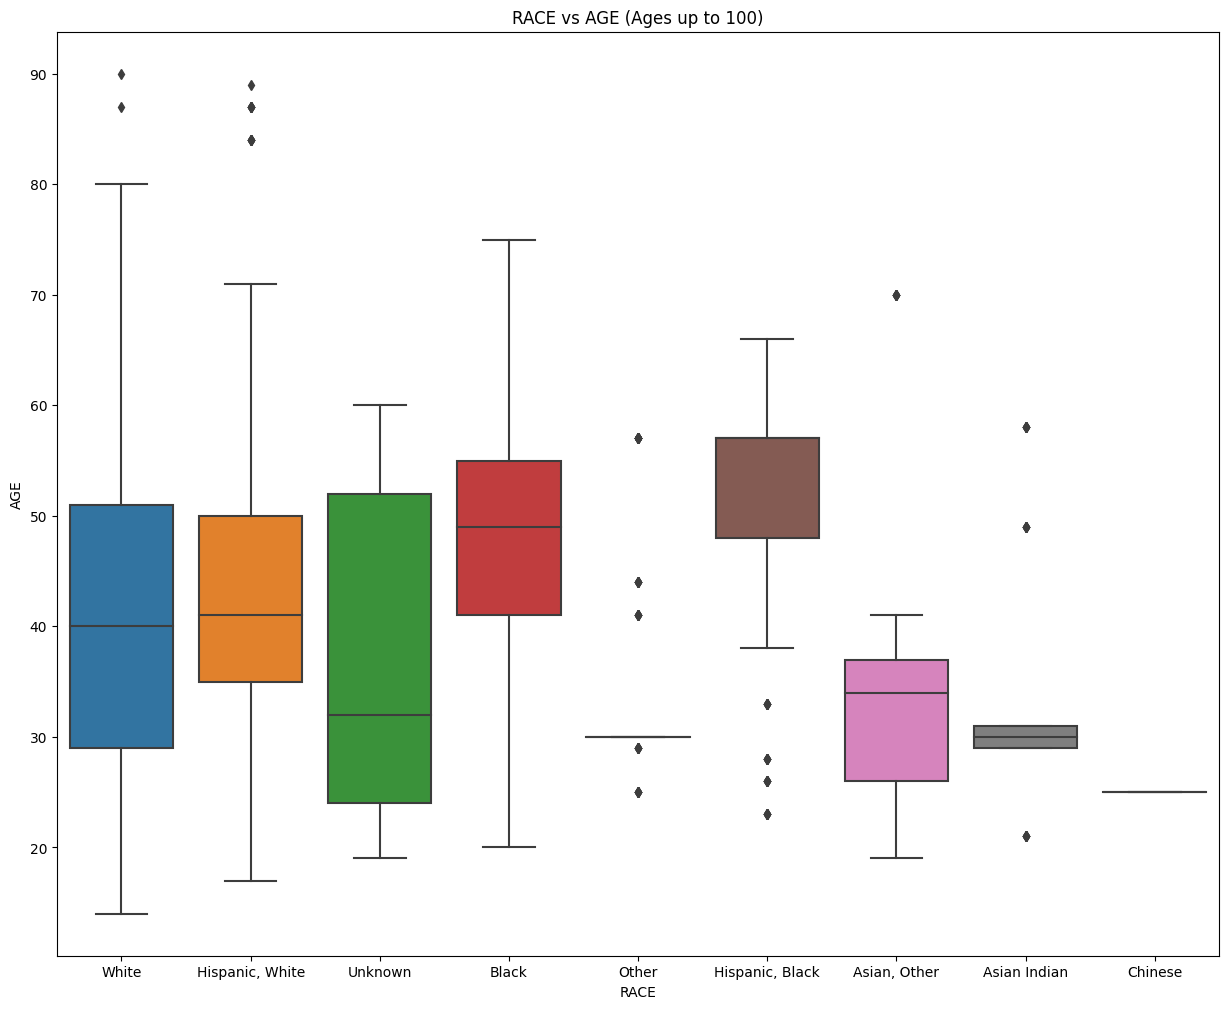

In [337]:
# Filter the data to include ages up to 100
filtered_data = df[df['AGE'] <= 100]

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['AGE'], filtered_data['RACE'])

plt.figure(figsize=(15, 12))
filtered_data = df[df['AGE'] <= 100]  # Filter data for ages up to 100
sns.boxplot(x='RACE', y='AGE', data=filtered_data)
plt.title('RACE vs AGE (Ages up to 100)')
plt.show()


In the dataset, Chinese and Asian Indian patients predominantly fall into the young age category. In contrast, White, Hispanic White, and Black patients span a wider age range, encompassing individuals from young ages to senior citizens.

##### Bivariate Analysis AGE VS SIDE EFFECTS

In [338]:
# Create age bins with three groups: 0-30, 31-60, and 60 above
age_bins = pd.cut(df['AGE'], bins=[0, 30, 60, float('inf')], labels=['0-30', '31-60', '60+'])
contingency_table = pd.crosstab(age_bins, df['SIDE EFFECTS'])

# Display the contingency table
print(contingency_table)


SIDE EFFECTS  Extremely Severe Side Effects  Mild Side Effects  \
AGE                                                              
0-30                                   1974              34632   
31-60                                 20730              88875   
60+                                     228               9154   

SIDE EFFECTS  Moderate Side Effects  No Side Effects  Severe Side Effects  
AGE                                                                        
0-30                          21939            26067                10081  
31-60                         46461            82553                38991  
60+                            5762             6620                 4121  


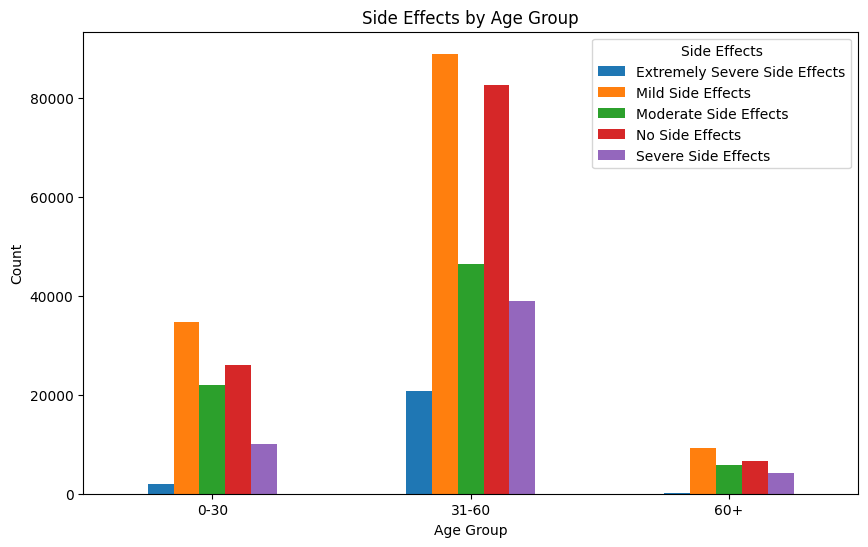

In [339]:
ax = contingency_table.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Side Effects by Age Group')

# Display the legend
plt.legend(title='Side Effects', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

Trends in Severity: "Mild Side Effects" consistently rank as the most reported across all age groups, closely followed by "Moderate Side Effects." Notably, the incidence of "Severe Side Effects" and "Extremely Severe Side Effects" tends to rise with age, with the 60+ age group exhibiting a relatively higher proportion of these severe reactions.

##### Bivariate Analysis RACE VS SIDE EFFECTS

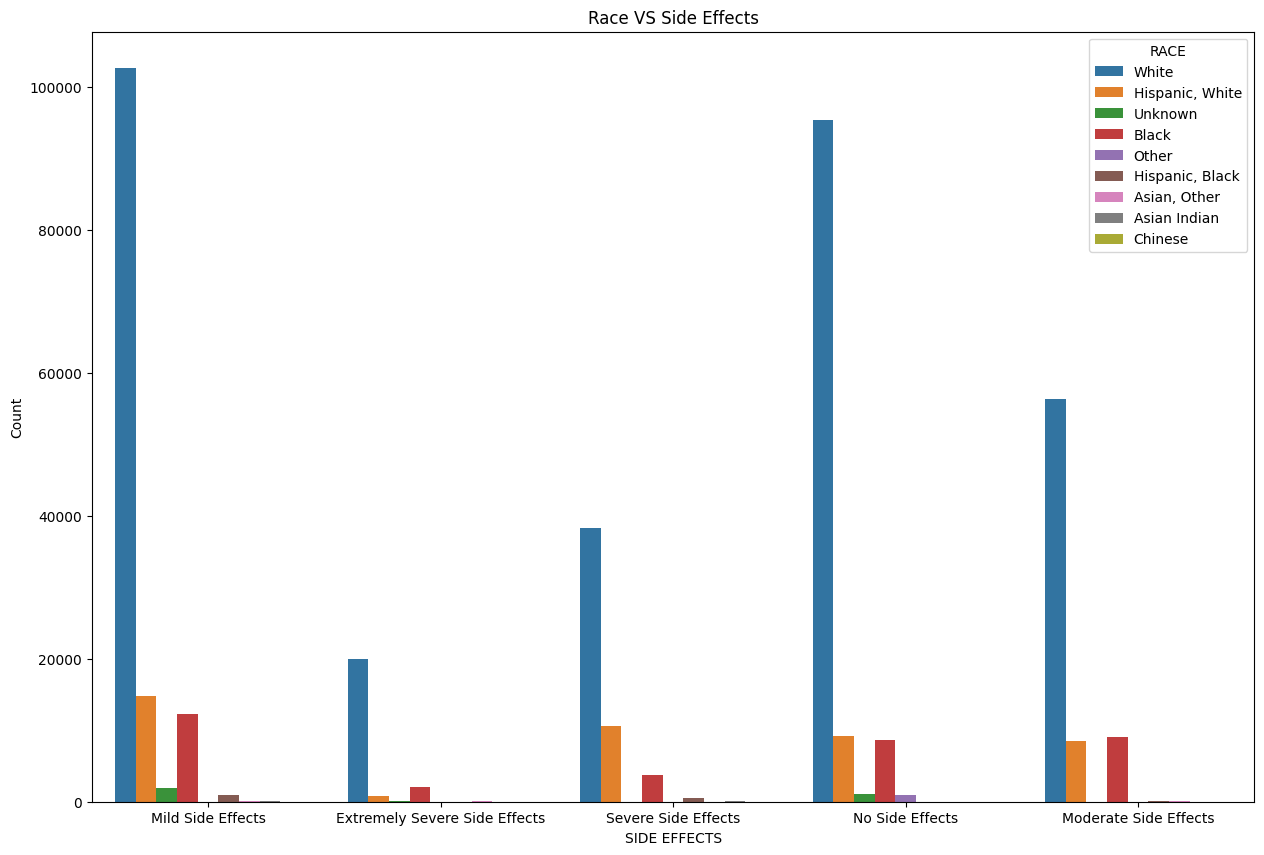

In [340]:
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed
sns.countplot(x='SIDE EFFECTS', hue='RACE', data=df)
plt.xlabel('SIDE EFFECTS')
plt.ylabel('Count')
plt.title('Race VS Side Effects')
plt.show()


Blacks exhibit significantly more severe side effects compared to Hispanic Whites, while they also display moderately higher side effects than Hispanic Whites.

### MULTIVARIATE ANALYSIS

##### Multivariate Analysis DRUG NAME VS GENDER VS AGE

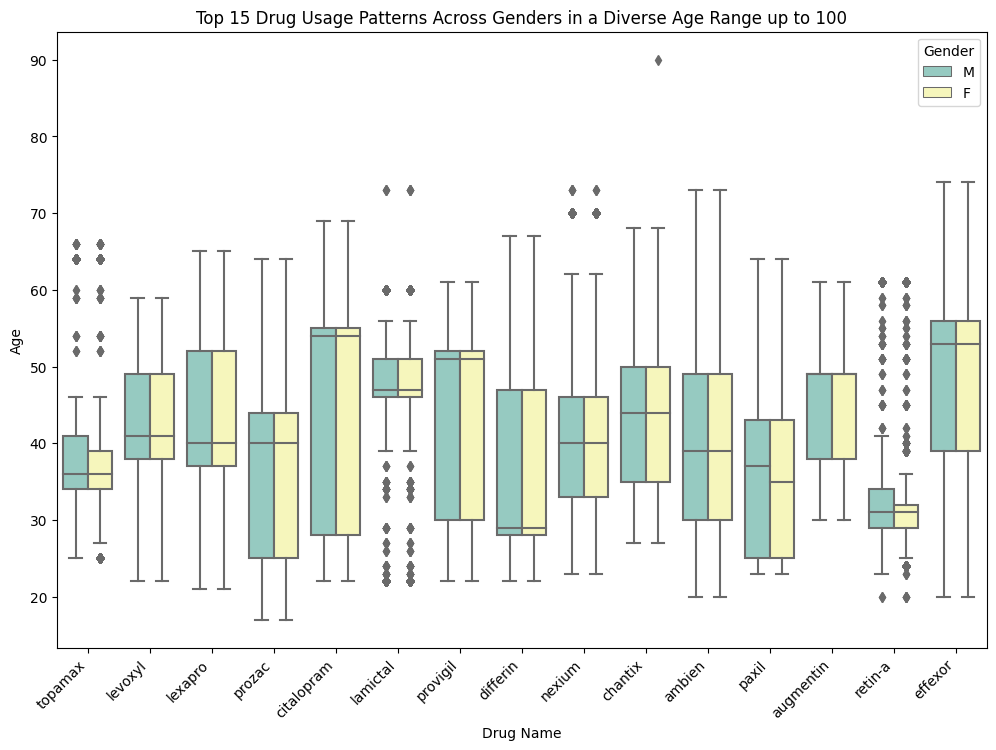

In [341]:
# Filter the data to include ages up to 100
filtered_data = df[df['AGE'] <= 100]

# Get the top 15 drug names from the filtered data
top_n = 15
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data again to include only the top 15 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Create a box plot for the top 15 drug names vs. gender for ages up to 100
plt.figure(figsize=(12, 8))
sns.boxplot(x='DRUG NAME', y='AGE', hue='GENDER', data=filtered_data, palette='Set3')
plt.xlabel('Drug Name')
plt.ylabel('Age')
plt.title(f'Top {top_n} Drug Usage Patterns Across Genders in a Diverse Age Range up to 100')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

The age range considered extends up to 100, with an average age between 70 and 100. Among younger patients, males exhibit a higher prevalence of skin concerns compared to females. In contrast, older patients, regardless of gender, commonly experience depression.

##### Multivariate Analysis age vs top 10 drug name vs race

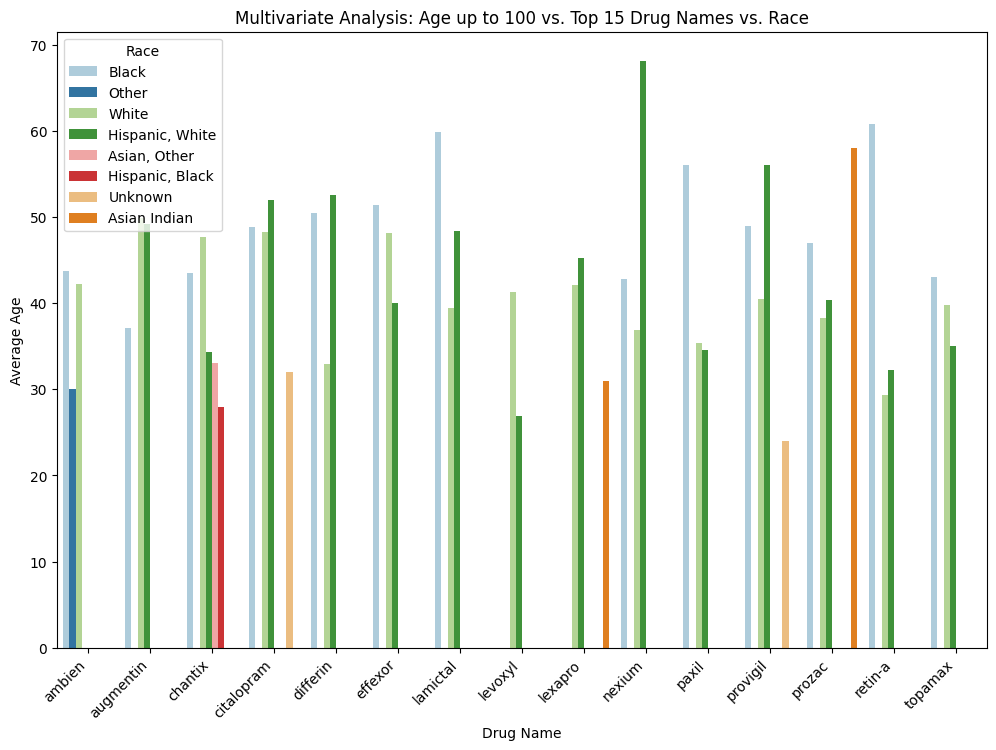

In [342]:

filtered_data = df[df['AGE'] <= 100]

# Get the top 15 drug names from the filtered data
top_n = 15
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data again to include only the top 15 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Calculate the average age for each combination of 'Drug Name' and 'Race'
age_by_drug_race = filtered_data.groupby(['DRUG NAME', 'RACE'])['AGE'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='DRUG NAME', y='AGE', hue='RACE', data=age_by_drug_race, palette='Paired')
plt.title('Multivariate Analysis: Age up to 100 vs. Top 15 Drug Names vs. Race')
plt.xlabel('Drug Name')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race')
plt.show()



Individuals aged 45 and above from the Black community are utilizing 9 out of 10 drugs, while Whites aged 30-47 are using the full spectrum of drugs. Asian Indians are limited to using only 2 drugs, while Ambien is prevalent among other ethnic groups. Citalopram sees widespread usage across various demographics.

In [343]:
df.columns

Index(['NAME', 'GENDER', 'DRUG NAME', 'AGE', 'RACE', 'SIDE EFFECTS',
       'Age_Group'],
      dtype='object')

In [344]:
columns_to_drop = ['Age_Group', 'AGE Group', 'AGE_GROUP']

for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(column, axis=1)

##### Multivariate Analysis: Examining the Interplay of Age, Side Effects, and Top 15 Drug Names

In [345]:


# Define age bins for three categories: 0-30, 31-60, and 61+
age_bins = [0, 30, 60, 150]

# Create labels for the age bins
age_labels = ['0-30', '31-60', '61+']

# Add a new column 'AGE_GROUP' to the DataFrame with age group labels
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Filter the data to include ages up to 100
filtered_data = df[df['AGE'] <= 100]

# Get the top 10 drug names used by people of all age groups
top_n = 15
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Create a contingency table
contingency_table = pd.crosstab([filtered_data['AGE_GROUP'], filtered_data['DRUG NAME']], filtered_data['SIDE EFFECTS'])

# Display the contingency table
contingency_table


SIDE EFFECTS          Extremely Severe Side Effects  Mild Side Effects  \
AGE_GROUP DRUG NAME                                                      
0-30      ambien                                  0                541   
          augmentin                               0                  8   
          chantix                                16                  8   
          citalopram                              0                517   
          differin                                0               1456   
          effexor                               509                 48   
          lamictal                                8                975   
          levoxyl                                 0                 56   
          lexapro                                40               1007   
          nexium                                  0                  0   
          paxil                                  40               1955   
          provigil                                0               1944   
          prozac                                  0               1551   
          retin-a                                 0                 56   
          topamax                                 8                957   
31-60     ambien                                  0                131   
          augmentin                               0                 16   
          chantix                               968               1565   
          citalopram                              0               2942   
          differin                                0               1095   
          effexor                                 8               2588   
          lamictal                                0               3897   
          levoxyl                               947                992   
          lexapro                                96               1322   
          nexium                                  0               1048   
          paxil                                   8               1054   
          provigil                               16               2928   
          prozac                                998               1088   
          retin-a                                 0               1140   
          topamax                                 0               2469   
61+       ambien                                  0                 16   
          augmentin                               0                  0   
          chantix                                 0                 25   
          citalopram                              0                  0   
          differin                                0                 64   
          effexor                                 0                  8   
          lamictal                                0                  0   
          lexapro                                 0                  0   
          nexium                                  0                  8   
          paxil                                  40                  8   
          provigil                                0                  8   
          prozac                                  0                  0   
          retin-a                                 0                958   
          topamax                                 8                509   

SIDE EFFECTS          Moderate Side Effects  No Side Effects  \
AGE_GROUP DRUG NAME                                            
0-30      ambien                          8              968   
          augmentin                       0                0   
          chantix                         8                0   
          citalopram                   1012                0   
          differin                      959              532   
          effexor                        24               16   
          lamictal                        8               40   
          levoxyl  

In [346]:
#Dropping Unneseary column
df.drop('AGE_GROUP', axis=1,inplace=True)

# Pre-Processing

##### HANDLING MISSING VALUES

In [347]:
print("Percentage of Missing Values in Each Column:")
df.isna().mean()*100

Percentage of Missing Values in Each Column:


NAME            0.000000
GENDER          0.000000
DRUG NAME       0.000000
AGE             0.005023
RACE            0.000000
SIDE EFFECTS    0.000000
dtype: float64


The "Age" column exhibits a left-skewed distribution with a missing value percentage of 0.005023%. To address this, missing values were replaced with the median

In [348]:
df['AGE'].fillna(df['AGE'].median(),inplace =True)

In [349]:
df.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

##### Detection and Handling of Outlier

Text(0.5, 1.0, 'Boxplot for AGE')

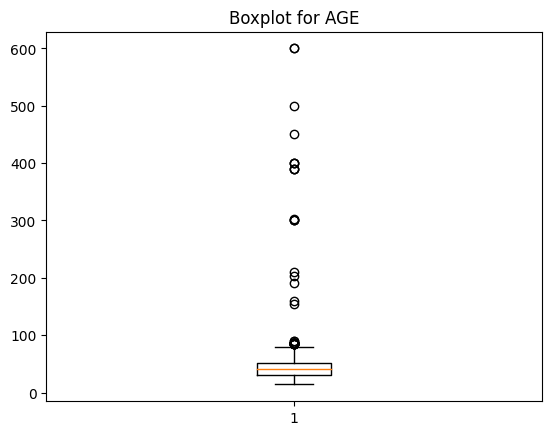

In [350]:
plt.boxplot(df['AGE'])
plt.title('Boxplot for AGE')

In [351]:
### 25 and 75 percentile
q1= df['AGE'].quantile(0.25)
q3= df['AGE'].quantile(0.75)
q1,q3

(31.0, 51.0)

In [352]:
### Finding IQR
IQR = q3-q1
IQR

20.0

In [353]:
## Upper and lower limit of Length of service
low_limit = q1 - 1.5*IQR
upr_limit = q3 + 1.5*IQR
low_limit,upr_limit

(1.0, 81.0)

In [354]:
#copying outliers from  datafram to new dataframe
age_out = df[(df['AGE']<low_limit)|(df['AGE']>upr_limit)]
age_out.shape

(38, 6)

In [355]:
age_out.AGE.unique()


array([300., 302.,  87.,  90.,  84., 500., 400., 203., 160., 191., 450.,
       390., 155., 600., 211., 401.,  89.])

In [356]:
print('percent of Age outlier in data : ',len(age_out)/len(df)*100)

percent of Age outlier in data :  0.009542751526840244


In [357]:

# Identify outliers above and below specified limits
outliers_above = df[df['AGE'] > upr_limit].index
outliers_below = df[df['AGE'] < low_limit].index

outliers_above,outliers_below


(Int64Index([  3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
             111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
             186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
             264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
             325631, 333669, 337790, 363934, 384352, 393820],
            dtype='int64'),
 Int64Index([], dtype='int64'))

In [358]:
# Extract 'AGE' values for the outliers above the upper limit
outliers_above_values = df.loc[outliers_above, 'AGE']

# Filter data to include only 'AGE' values less than or equal to 100
df = df[df['AGE'] <= 100]

In [359]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [360]:
df.shape

(398189, 6)

In [361]:
df.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

##### Encoding

In [362]:
df.columns

Index(['NAME', 'GENDER', 'DRUG NAME', 'AGE', 'RACE', 'SIDE EFFECTS'], dtype='object')

In [364]:
## One Hot Encoding Gender and RACE

from sklearn.preprocessing import LabelEncoder
label_columns = ['GENDER','RACE','SIDE EFFECTS']
# Initialize LabelEncoder
le = LabelEncoder()
for column in label_columns:
    df[column] = le.fit_transform(df[column])


In [368]:
# Calculate frequency of each category
frequency_map = df['DRUG NAME'].value_counts(normalize=True).to_dict()

# Create a new column with frequency encoding
df['DRUG_NAME_ENCODED'] = df['DRUG NAME'].map(frequency_map)

In [369]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS,DRUG_NAME_ENCODED
0,Aaban,1,topamax,41.0,8,1,0.011557
1,Aaban,1,zocor,53.0,5,0,0.001557
2,Aabha,0,tazorac,31.0,8,1,0.004237
3,Aabha,0,voltaren,44.0,8,4,0.007459
4,Aabid,1,tramadol,24.0,8,3,0.008069


In [370]:
# Drop the original 'Drug Name' column
df = df.drop(['DRUG NAME'], axis=1)

In [372]:
df.shape

(398189, 6)

##### Feature Reduction

In [373]:
df.drop(['NAME'],axis=1,inplace=True)

In [374]:
df.head()

,GENDER,AGE,RACE,SIDE EFFECTS,DRUG_NAME_ENCODED
0,1,41.0,8,1,0.011557
1,1,53.0,5,0,0.001557
2,0,31.0,8,1,0.004237
3,0,44.0,8,4,0.007459
4,1,24.0,8,3,0.008069


Droped Name column as it is not relevant for our model

##### Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

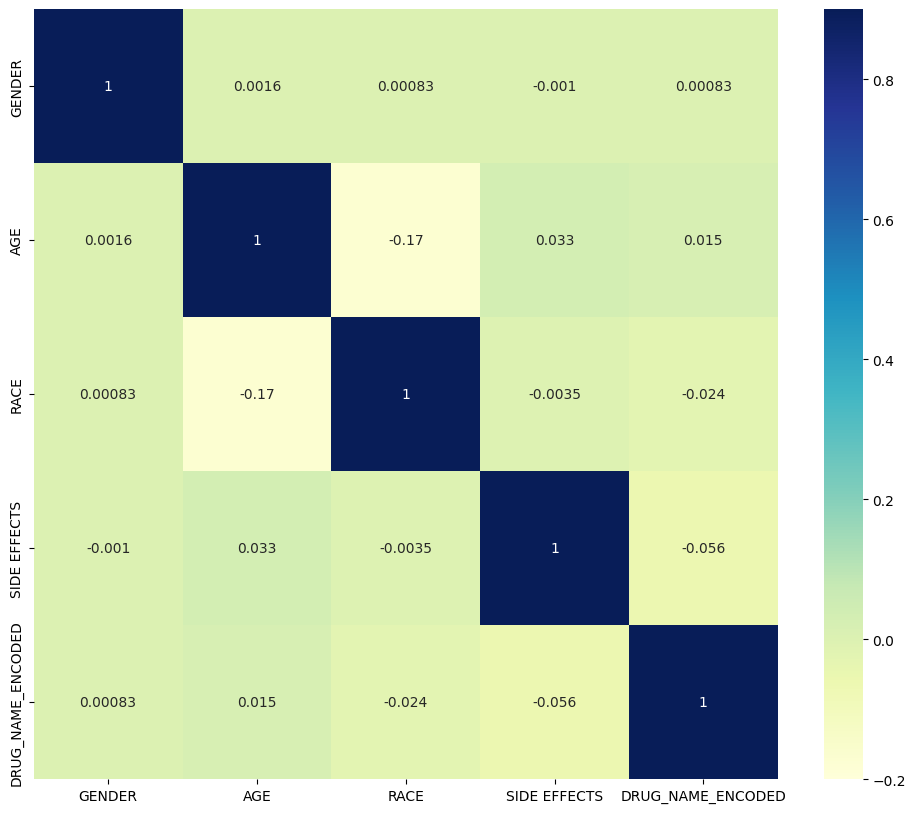

In [375]:
plt.figure(figsize=(12,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show

No correlation between any features. So I am not dropping anything.

##### Scaling

Not doing scaling because scaling has to be done on continuous numerical columns. But in my dataset all are discrete.

# Model Evaluation and Selection

##### Train Test Split

In [376]:
x=df.drop('SIDE EFFECTS',axis=1)
y=df['SIDE EFFECTS']

In [377]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [378]:
print("X_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (298641, 4)
y_train Shape:  (298641,)
X_test Shape:  (99548, 4)
y_test Shape:  (99548,)


##### Testing with different models

In [379]:
#  Considering models which are not affected by the magnitude difference in each features.
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [380]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'GaussianNB':GaussianNB(),
          'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)}


for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
DecisionTreeClassifier  trained
GaussianNB  trained
GradientBoostingClassifier  trained


In [383]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

model_test_acc = []
model_test_recall_score = []
model_test_f1_score = []
model_test_precision_score = []
model_conf_mat = []

# Checking the scores of classifiers
for name, model in models.items():
    y_pred = model.predict(x_test)

    # Accuracy
    model_test_acc.append(accuracy_score(y_test, y_pred))

    # Recall (per class)
    model_test_recall_score.append(recall_score(y_test, y_pred, average='weighted'))

    # F1 Score
    model_test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

    # Precision
    model_test_precision_score.append(precision_score(y_test, y_pred, average='weighted'))

    # Confusion Matrix
    model_conf_mat.append(confusion_matrix(y_test, y_pred))

# Creating a dictionary for confusion matrices
confusion_matrix_dict = {
    'Random Forest': model_conf_mat[0],
    'Decision Tree': model_conf_mat[1],
    'GaussianNB': model_conf_mat[2],
    'Gradient Boosting Classifier': model_conf_mat[3],
}

confusion_matrix_dict

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Random Forest': array([[ 5359,   252,    14,    47,    17],
        [   21, 32845,    97,   155,    46],
        [   17,   257, 17878,   309,    33],
        [   35,   118,    56, 28424,   287],
        [   12,    62,    29,    72, 13106]]),
 'Decision Tree': array([[ 5370,   250,     8,    46,    15],
        [   21, 32887,    93,   124,    39],
        [   22,   259, 17883,   301,    29],
        [   35,   135,    56, 28411,   283],
        [   13,    60,    29,    72, 13107]]),
 'GaussianNB': array([[    0,  1460,   515,  3714,     0],
        [    0, 16959,  1545, 14660,     0],
        [    0,  7766,  2013,  8715,     0],
        [    0,  9795,  1675, 17450,     0],
        [    0,  6259,   684,  6338,     0]]),
 'Gradient Boosting Classifier': array([[ 3908,   898,    50,   808,    25],
        [  269, 27812,  2104,  2838,   141],
        [   27,  2628, 14064,  1701,    74],
        [  261,  2944,   386, 24687,   642],
        [   20,  2020,   713,  1927,  8601]])}

In [384]:
Models = ['Random Forest','DecisionTree','GaussianNB','GradientBoostingClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score': model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.980552,0.980517,0.980552,0.980621
1,DecisionTree,0.981014,0.980980,0.981014,0.981081
2,GaussianNB,0.365874,0.306922,0.365874,0.291543
3,GradientBoostingClassifier,0.794310,0.793007,0.794310,0.801309


DECSION TREE IS THE BEST MODEL ON THE BASIS OF METRICS OTHER THAN ACCURACY

In [386]:
from sklearn.model_selection import StratifiedKFold
# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store precision, recall, and F1 scores for each fold
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    X_train_cv, X_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Fit the classifier on the training data
    dt_classifier.fit(X_train_cv, y_train_cv)

    # Predict on the test data
    y_pred_cv = dt_classifier.predict(X_test_cv)

    # Calculate precision, recall, and F1 scores
    precision = precision_score(y_test_cv, y_pred_cv,average='weighted')
    recall = recall_score(y_test_cv, y_pred_cv,average='weighted')
    f1 = f1_score(y_test_cv, y_pred_cv,average='weighted')

    precision_scores_dt.append(precision)
    recall_scores_dt.append(recall)
    f1_scores_dt.append(f1)

# Calculate and print the mean precision, recall, and F1 scores across all folds
mean_precision = sum(precision_scores_dt) / len(precision_scores_dt)
mean_recall = sum(recall_scores_dt) / len(recall_scores_dt)
mean_f1 = sum(f1_scores_dt) / len(f1_scores_dt)

print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)

Mean Precision: 0.9809675440721051
Mean Recall: 0.9809160966791864
Mean F1 Score: 0.9809058901177726


##### HyperTuning

In [393]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'random_state': [None, 42],
}

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
cv_model_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_params,
                                 scoring='f1_weighted', n_jobs=-1, return_train_score=True,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Fit the randomized search to your training data
cv_model_dt.fit(X_train_cv, y_train_cv)

# Get the best hyperparameters for Decision Tree
best_params_dt = cv_model_dt.best_params_

# Print the best parameters
print("Best Parameters for Decision Tree (F1 Weighted Score):", best_params_dt)

Best Parameters for Decision Tree (F1 Weighted Score): {'splitter': 'best', 'random_state': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}


In [398]:
best_params_dt

{'splitter': 'best',
 'random_state': None,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'entropy'}

In [406]:
   # Create and train the Decision Tree Classifier with best hyperparameters
decision_tree = DecisionTreeClassifier(**best_params_dt)
decision_tree.fit(x_train, y_train)

# Make predictions
y_pred = decision_tree.predict(x_test)




# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')





print("Mean Accuracy:", accuracy)
print("Mean Precision:", precision)
print("Mean Recall:", recall)
print("Mean F1 Score:", f1)

Mean Accuracy: 0.9809639570860289
Mean Precision: 0.9812080919490939
Mean Recall: 0.97427364840247
Mean F1 Score: 0.9776155208370026
